July 23 - Correlation
============
* Correlation
* Linear regression
* Scatter Matrix
* Correlation Matrix

CWK: Compute and plot the correlation matrices for temperature and precipitation (two separate matrices) between New York, Philadelphia, Newark and Boston using the 2005-2015 time record and then visualize them. Then compute the correlation between temperature and precipitation for each city and plot temperature vs. precipitation with the best fit line for the cities with the highest correlation between them.  Submit these graphs and a paragraph discussing whether the timeseries and regional patterns support these correlations, with references back to the graphs and previous work to support your assertions. 


In [2]:

import pandas as pd
import numpy as np

data_path = "C:\\Users\\story645\\Desktop\\EAS213_2015\\571549.csv"
df = pd.read_csv(data_path)

nyc_inds = [sn.endswith("NY US") for sn in df['STATION_NAME']]
nyc = df[nyc_inds]
datakeys = [u'EMXP', u'MXSD', u'TPCP', u'TSNW', u'EMXT', u'EMNT', u'MMXT', u'MMNT', u'MNTM']
for dk in datakeys:
    nyc[dk][nyc[dk]==-9999]= np.nan

nyc_agg = nyc.groupby('DATE').mean()

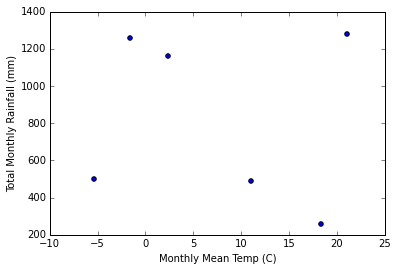

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nyc_agg['MNTM']/10,nyc_agg['TPCP']) #rescale
ax.set_xlabel("Monthly Mean Temp (C)") #Label!
ax.set_ylabel("Total Monthly Rainfall (mm)") 

In [6]:
from scipy.stats import pearsonr
print nyc_agg['MNTM'].corr(nyc_agg['TPCP'])
print pearsonr(nyc_agg['MNTM'], nyc_agg['TPCP'])

-0.106962078839
(-0.1069620788389032, 0.84016875223335818)


Now compute correlation for:
* total precip vs average precip
* temperature vs. snow depth
* one other variable pair of your choice (2015 dataset)